#  استفاده از مدل برای تشخیص ارقام فارسی

font : b yekan

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

In [2]:
_translator = str.maketrans("1234567890", "۱۲۳۴۵۶۷۸۹۰")

In [3]:
def latin_to_persian(number):
    return number.translate(_translator)

In [4]:
def extract_chars(result):
    df = result.pandas().xyxy[0] # because we only need the first one
    df = df.sort_values('xmin') # sorts them write to left'
    
    output_string = []
    for name, confidence in zip(df['name'], df['confidence']):
        if confidence > 0.8:
            output_string.append(name)
            
    output_string = ''.join(output_string)
    output_string = latin_to_persian(output_string)
    return output_string

In [5]:
number_model = letter_model = model = torch.hub.load('ultralytics/yolov5', 'custom', path='models/numbers.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Laya/.cache\torch\hub\master.zip
YOLOv5  2023-6-28 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 290 layers, 20889303 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


### Persian Digit Recognition Test 1

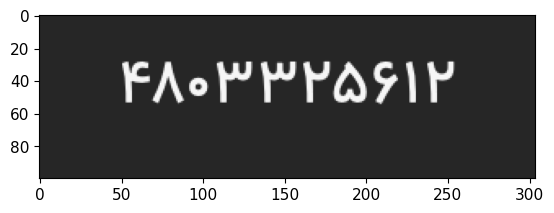

In [6]:
numbers_image = cv2.imread("Images\OCR_Persian_number1.png")
%matplotlib inline

plt.imshow(numbers_image)

In [7]:
%time

numbers_result = number_model(numbers_image)


Wall time: 0 ns


In [8]:
extract_chars(numbers_result)

'۴۸۰۳۳۲۵۶۱۲'

### Persian Digit Recognition Test 2

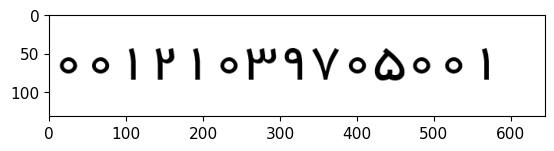

In [10]:
numbers_image = cv2.imread("Images\OCR_Persian_number2.png")
%matplotlib inline

plt.imshow(numbers_image)

In [11]:
%time

numbers_result = number_model(numbers_image)


Wall time: 0 ns


In [12]:
extract_chars(numbers_result)

'۰۰۱۲۱۰۳۹۷۰۵۰۰'

### Persian Digit Recognition Test 3

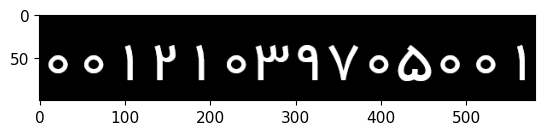

In [13]:
numbers_image = cv2.imread("Images\OCR_Persian_number3.png")
%matplotlib inline

plt.imshow(numbers_image)

In [14]:
%time

numbers_result = number_model(numbers_image)


Wall time: 0 ns


In [16]:
text=extract_chars(numbers_result)
print (text)

۰۰۱۲۱۰۳۹۷۰۵۰۰۱


In [17]:
countOfDigits=0;
countOfLetter=0;

for t in text:
    if t.isdigit():
        countOfDigits +=1
        print(t)
    elif t.isspace():
        t.strip()
    else:
        countOfLetter +=1
        print(t)

print("countOfDigits: ",countOfDigits)
print("countOfLetter: ",countOfLetter)

۰
۰
۱
۲
۱
۰
۳
۹
۷
۰
۵
۰
۰
۱
countOfDigits:  14
countOfLetter:  0
